In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE,RFECV
from mlxtend.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Concrete_Data.csv')

In [4]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# ML Pipeline

### Data Preprocessing
#### Collection
#### Format
#### Treat Anomalies
#### Encoding 

### Feature Extraction
#### Feature Transformation
#### Feature Engineering
#### Feature Selection
#### Stepwise Feature Selection (SFS) 
#### Recursive Feature elimination (RFS)

### Modelling
#### Model Building
#### Model Evaluation
###### Train Test data
###### Scores (R2,Adj R2)
###### Errors (MSE,RMSE,MAE,MAPE)

### Optimization
#### Bias & Variation Trade off
#### Model Validation techniques
#### K-fold cross Validation
#### LOOCV (Leave one out Cross Validation)
#### Fine Tunning


# ML Pipeline

* **Data Preprocessing**
* ***Collection***
* Format
* Treat Anomalies
* Encoding 

* ***Feature Extraction***
* Feature Transformation
* Feature Engineering
* Feature Selection
* Stepwise Feature Selection (SFS) 
* Recursive Feature elimination (RFS)

* ***Modelling***
* Model Building
* ***Model Evaluation***
* Train Test data
* Scores (R2,Adj R2)
* Errors (MSE,RMSE,MAE,MAPE)

* ***Optimization***
* Bias & Variation Trade off
* Model Validation techniques
* K-fold cross Validation
* LOOCV (Leave one out Cross Validation)
* Fine Tunning


## "Data Preprocessing"

In [5]:
# Descriptive Analysis of the data
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 1030
No. of columns 9


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


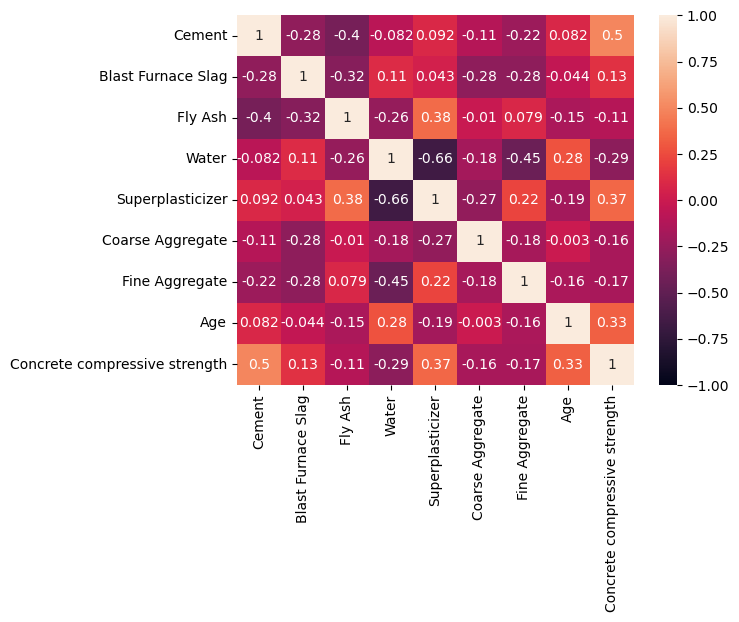

In [7]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1);

In [8]:
# we have identified some duplicated rows in the dataset
data.duplicated().sum()

25

In [9]:
data.drop_duplicates(inplace=True)

* Univariate Analysis and Bivariate Analysis


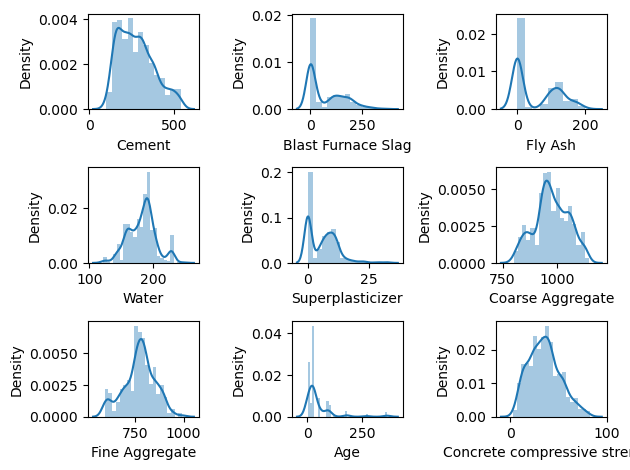

In [10]:
t=1
for i in data.columns:
    plt.subplot(3,3,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [11]:
data.rename(columns={'Concrete compressive strength':'CCS'},inplace=True)

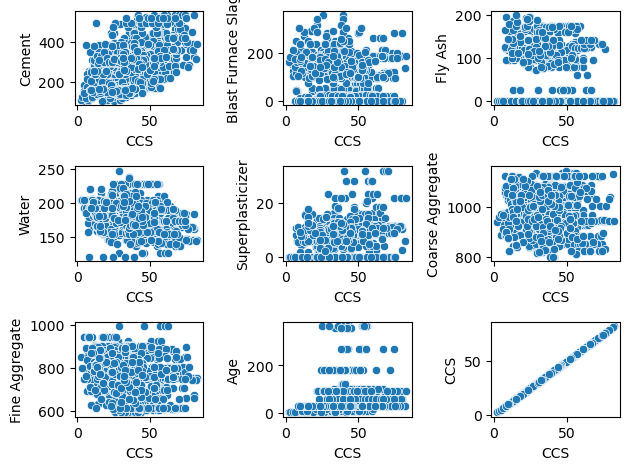

In [12]:
t=1
for i in data.columns:
    plt.subplot(3,3,t)
    sns.scatterplot(x=data['CCS'],y=data[i])
    t+=1
plt.tight_layout()
plt.show()

* Treat Annomalies (missing values and outlier)

In [13]:
data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
CCS                   0
dtype: int64

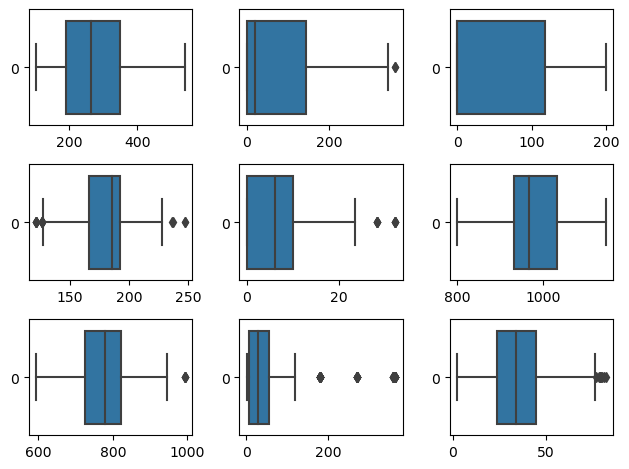

In [14]:
t = 1 
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [15]:
# Removing Outliers
q3= data.quantile(0.75)
q1= data.quantile(0.25)

iqr= q3-q1

upper_limit= q3+1.5*iqr
lower_limit=q1-1.5*iqr



data= data.loc[~((data>upper_limit)|(data<lower_limit)).any(axis=1)]

In [16]:
# Since water and cement has high collinearity lets take cement to water ratio
data['Cement Water ratio'] = data['Cement']/data['Water']
data.drop(columns = ['Cement','Water'],inplace=True)

data.drop(columns = ['Coarse Aggregate','Fine Aggregate'],inplace = True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = data.drop(columns='CCS')
y = data['CCS']


In [19]:
# Check VIF for multicollienariry


vif_list = []

for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))

pd.DataFrame({'Feature Names':x.columns,'VIF':vif_list}).\
sort_values(by='VIF',ascending=False)

,Feature Names,VIF
2,Superplasticizer,3.992459
4,Cement Water ratio,2.941740
1,Fly Ash,2.699348
3,Age,2.110917
0,Blast Furnace Slag,1.538589


In [20]:
train_x ,test__x,train_y,test_y = train_test_split(x,y,train_size=0.75,random_state=2)

In [21]:
print(train_x.shape ,test__x.shape,train_y.shape,test_y.shape)

(683, 5) (228, 5) (683,) (228,)


In [22]:
from scipy import stats

In [23]:
stats.ttest_ind(y,train_y)

Ttest_indResult(statistic=0.4212904380169579, pvalue=0.6735998831332586)

In [24]:
stats.ttest_ind(y,test_y)

Ttest_indResult(statistic=-0.8707586365329388, pvalue=0.38406976039450114)

In [25]:
stats.ttest_ind(train_y,test_y)

Ttest_indResult(statistic=-1.118390147242486, pvalue=0.26369586952760005)

## "Feature Extraction"

In [26]:
# Feature transformation

**why do we need feature transformation**

1. In case of skewed variable, we transform it to reduce the skewness 
2. If assumptions of LR are not met, transformation of skewed target variable will help making the error term more compatible to the assumptions 
3. It will transform the non linear relation b/w the target and independent variables to a linear relation. Assumption of linearity or normality

**Note: Comparision of model performance should be done using original units for the target variable and not the units after transformation.**

**Feature Scaling: We do not scale the features to have correct factors or slope for independent variable.This usually for distance based algorithms Models.**

## Modelling

In [27]:
# check for the assumptions.
# 1. Dependent variables must be numeric
data['CCS'].describe()

count    911.000000
mean      34.033019
std       15.852205
min        2.330000
25%       22.335000
50%       33.060000
75%       44.110000
max       76.800000
Name: CCS, dtype: float64

In [28]:
# 2. check for the multicollinearity 
# VIF
# VIF

vif_list = []
for i in range(train_x.shape[1]):
    vif_list.append(variance_inflation_factor(train_x.values,i))
                    
pd.DataFrame({'Feature Names':train_x.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Feature Names,VIF
2,Superplasticizer,3.949944
4,Cement Water ratio,2.926997
1,Fly Ash,2.679954
3,Age,2.058730
0,Blast Furnace Slag,1.527399


In [29]:
# Lets build a base model
train_x_c = sma.add_constant(train_x)
test__x_c = sma.add_constant(test__x)
base_model = sma.OLS(train_y,train_x_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CCS   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     417.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          5.56e-204
Time:                        13:59:22   Log-Likelihood:                -2381.8
No. Observations:                 683   AIC:                             4776.
Df Residuals:                     677   BIC:                             4803.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.2729      1.418    -10.771      0.000     -18.057     -12.489
Blast Furnace Slag     0.0728      0.005     15.681      0.000       0.064       0.082
Fly Ash                0.0566      0.008      7.294      0.000       0.041       0.072
Superplasticizer       0.2868      0.082      3.503      0.000       0.126       0.448
Age                    0.3188      0.011     29.881      0.000       0.298       0.340
Cement Water ratio    18.6812      0.671     27.853      0.000      17.364      19.998
==============================================================================
Omnibus:                        2.585   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.413
Skew:                           0.136   Prob(JB):                        0.299
Kurtosis:                       3.106   Cond. No.                         601.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Assumptions3: Linearity of model

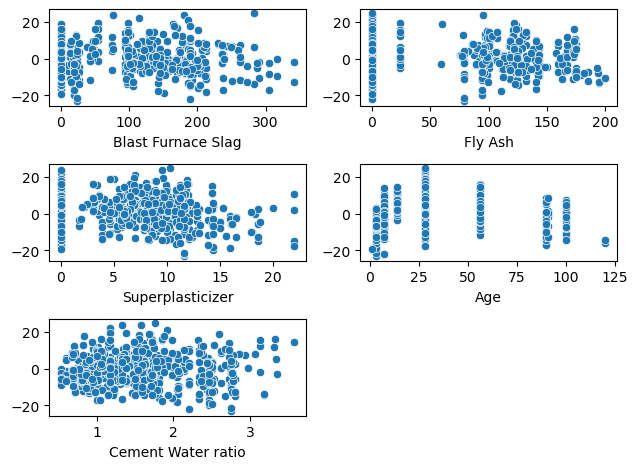

In [31]:
t = 1
for i in train_x.columns:
    plt.subplot(3,2,t)
    sns.scatterplot(x = train_x[i],y= base_model.resid)
    t+=1
plt.tight_layout()
plt.show()

In [32]:
# In order to have the final conclusion lets apply rainbow test to check for linearity.
from statsmodels.stats.diagnostic import linear_rainbow
# this is new test (test for linearity of variable)
# Ho: Variables are linear
# Ha: Variables are not linear

p_value = linear_rainbow(base_model)[1]

if p_value<0.05:
    print('Reject Ho')
else:
    print('Fail to Reject Ho')

Fail to Reject Ho


In [33]:
# Assumption of Autocorrelation4:

# Durbin Watson = 1.999 shows so we can say that there is no autocorrelation.

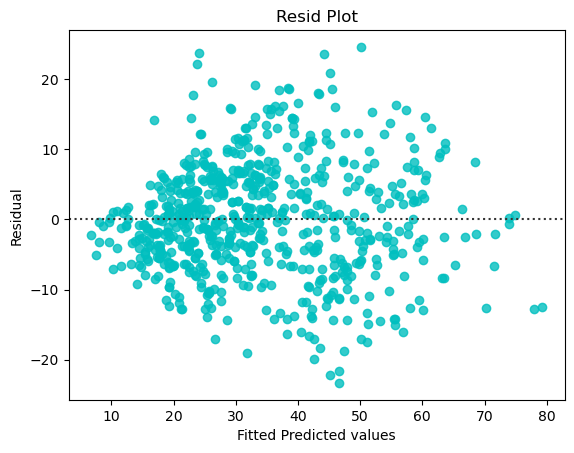

In [34]:
# Assumption 5:
# residual Plot
sns.residplot(x=base_model.fittedvalues,y=base_model.resid,color='c')
plt.xlabel('Fitted Predicted values')
plt.ylabel('Residual')
plt.title('Resid Plot')
plt.show()

In [35]:
# Goldfeld Quandt test

# Ho : The variance is same: Homoscedasticity
# Ha : The variance is not same : Hetroscedasticity
p_value = sma.stats.diagnostic.het_goldfeldquandt(y=train_y,x=train_x_c,drop=0.1)[1]

if p_value>0.05:
    print('Fail to Reject Ho')
else:
    print('Reject Ho')
print(p_value)

Fail to Reject Ho
0.12065239225574116


In [36]:
# Breusch Pagan test

# Ho : The variance is same: Homoscedasticity
# Ha : The variance is not same : Hetroscedasticity

p_value = sma.stats.diagnostic.het_breuschpagan(resid = base_model.resid,exog_het=base_model.model.exog)[1]

if p_value>0.05:
    print('Fail to Reject Ho')
else:
    print('Reject Ho')
print(p_value)

Reject Ho
6.432496159381779e-11


In [37]:
# we have hetroscedasticity in this .

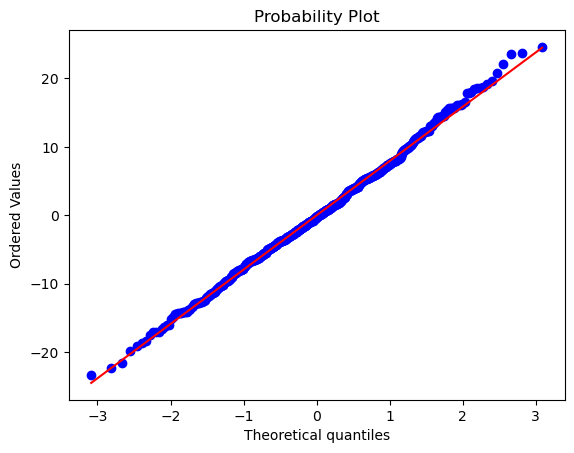

In [38]:
# Assumption for normality .
# qqplot for distribution
stats.probplot(base_model.resid,plot=plt)
plt.show()

In [39]:
stats.shapiro(base_model.resid)

ShapiroResult(statistic=0.9973573088645935, pvalue=0.3444623649120331)

In [40]:
# Shapiro-Wilk Test n<5000
# Ho: The data is normal
# Ha: The data is not normal


p_value = stats.shapiro(base_model.resid)[1]
if p_value>0.05:
    print('Fail to reject Ho')
else:
    print('Reject Ho')
print(p_value)

Fail to reject Ho
0.3444623649120331


## Model Evaluation

In [41]:
def validation(test,pred,data):
    r2 = r2_score(test,pred)
    print('R Squared:',r2)
    n = data.shape[0]
    k = data.shape[1]
    r2_adj = 1 - ((1-r2)*(n-1)/(n-k-1))
    print('Adj R square',r2_adj)
    print('MSE',mean_squared_error(test,pred))
    print('RMSE',np.sqrt(mean_squared_error(test,pred)))
    print('MAE',mean_absolute_error(test,pred))
    print('MAPE',mean_absolute_percentage_error(test,pred))

In [42]:
pred_train = base_model.predict(train_x_c)

In [43]:
validation(train_y,pred_train,train_x_c)

R Squared: 0.7549643038078333
Adj R square 0.7527894307647076
MSE 62.5969497912078
RMSE 7.9118234175952
MAE 6.242184241763275
MAPE 0.23711413033676618


In [44]:
final_model=LinearRegression()

In [45]:
final_model.fit(train_x,train_y)


LinearRegression()

In [46]:
pred_test = final_model.predict(test__x)

In [47]:
validation(test_y,pred_test,test__x_c)

R Squared: 0.7357812608942573
Adj R square 0.7286079014615222
MSE 62.4417299797897
RMSE 7.902007971382318
MAE 5.859914178040231
MAPE 0.19774022597769578


In [48]:
# So the model seems to underfitted 
# lets try some different algorithm on the model


## Cross Validation

In [49]:
import sklearn.metrics as metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [50]:
lr = LinearRegression()
cross_val = KFold(n_splits=3)
cv_scores = cross_val_score(estimator=lr,X=x,y=y,cv=cross_val,scoring='r2')

In [51]:
cv_scores


array([0.72099446, 0.72513674, 0.65323447])

In [52]:
print('Avg R2',np.mean(cv_scores),',Variation in R2',np.std(cv_scores)/np.mean(cv_scores))

Avg R2 0.6997885570410102 ,Variation in R2 0.04710296635738468


In [53]:
# LOOCV

lr = LinearRegression()
cross_val = LeaveOneOut()
cv_scores = cross_val_score(estimator=lr,X=x,y=y,cv=cross_val,\
                            scoring='neg_mean_absolute_percentage_error')

In [54]:
print(cv_scores.shape)
print(x.shape[0])
print('Both are equal')

(911,)
911
Both are equal


In [55]:
np.abs(np.mean(cv_scores))

0.23354029031738965

In [56]:
import sklearn

In [57]:
sklearn.__version__

'1.2.2'

In [58]:
x

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Cement Water ratio
1,0.0,0.0,2.5,28,3.333333
5,114.0,0.0,0.0,90,1.166667
7,95.0,0.0,0.0,28,1.666667
8,114.0,0.0,0.0,28,1.166667
9,0.0,0.0,0.0,28,2.083333
...,...,...,...,...,...
1025,116.0,90.3,8.9,28,1.538976
1026,0.0,115.6,10.4,28,1.643878
1027,139.4,108.6,6.1,28,0.770628
1028,186.7,0.0,11.3,28,0.906036


In [59]:
sfs = SequentialFeatureSelector(estimator=lr,k_features=4,scoring='r2',cv=3,
                               forward=False)  # backward feature selection

In [60]:
sfs.fit(train_x,train_y)

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), forward=False,
                          k_features=(4, 4), scoring='r2')

In [61]:
sfs.get_metric_dict

<bound method SequentialFeatureSelector.get_metric_dict of SequentialFeatureSelector(cv=3, estimator=LinearRegression(), forward=False,
                          k_features=(4, 4), scoring='r2')>

In [62]:
sfs.k_score_

0.7378254312856498

In [63]:
sfs = SequentialFeatureSelector(estimator=lr,k_features=4,scoring='r2',cv=3,
                               forward=True) # forward selection method

In [64]:
sfs.fit(train_x,train_y)

SequentialFeatureSelector(cv=3, estimator=LinearRegression(), k_features=(4, 4),
                          scoring='r2')

In [65]:
sfs.k_feature_names_

('Blast Furnace Slag', 'Fly Ash', 'Age', 'Cement Water ratio')

In [66]:
sfs.k_score_

0.7378254312856498

In [67]:
testx = test__x[['Blast Furnace Slag', 'Superplasticizer', 'Age', 'Cement Water ratio']]
trainx = train_x[['Blast Furnace Slag', 'Superplasticizer', 'Age', 'Cement Water ratio']]


In [68]:
lr = LinearRegression()

In [69]:
lr.fit(trainx,train_y)

LinearRegression()

In [70]:
pred_test = lr.predict(testx)


In [71]:
validation(test_y,pred_test,testx)

R Squared: 0.7004076210010879
Adj R square 0.6950337666692689
MSE 70.80143708492288
RMSE 8.414358982413507
MAE 6.4116759463722
MAPE 0.22528583864645157


##### RFE

In [72]:
rfe = RFE(estimator=lr,n_features_to_select=4,step=1)

In [73]:
rfe.fit(train_x,train_y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [74]:
rfe.get_feature_names_out()

array(['Blast Furnace Slag', 'Superplasticizer', 'Age',
       'Cement Water ratio'], dtype=object)

In [75]:
pred_train = rfe.predict(test__x)

In [76]:
validation(test_y,pred_train,test__x)

R Squared: 0.7004076210010879
Adj R square 0.6936600448975088
MSE 70.80143708492288
RMSE 8.414358982413507
MAE 6.4116759463722
MAPE 0.22528583864645157


In [77]:
rfecv = RFECV(estimator=lr)

In [78]:
rfecv.fit(train_x,train_y)

RFECV(estimator=LinearRegression())

In [79]:
rfecv.get_feature_names_out()

array(['Blast Furnace Slag', 'Fly Ash', 'Superplasticizer', 'Age',
       'Cement Water ratio'], dtype=object)

In [80]:
rfecv.score(test__x,test_y)

0.7357812608942573

In [81]:
import pickle

In [82]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix,cohen_kappa_score,accuracy_score

In [83]:
def model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    pred = m.predict(testx)
    print('MSE',mean_squared_error(test_y,pred))
    print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
    print('MAE',mean_absolute_error(test_y,pred))
    print('MAPE',mean_absolute_percentage_error(test_y,pred))
    r2 = r2_score(test_y,pred)
    print('R Squared:',r2)

In [84]:
model_validation(model=DecisionTreeRegressor(max_depth=5),trainx=trainx,trainy=train_y,
                testx=testx,testy=test_y)

MSE 52.6413447482554
RMSE 7.255435531258988
MAE 5.621211886713595
MAPE 0.2006527832849608
R Squared: 0.7772510508802916


In [85]:
model_validation(model=RandomForestRegressor(n_estimators=200,max_depth=5),trainx=trainx,trainy=train_y,
                testx=testx,testy=test_y)

MSE 37.66961131095442
RMSE 6.137557438505518
MAE 4.765705160333521
MAPE 0.17565174257373484
R Squared: 0.8406031157944334


In [86]:
model_validation(model=AdaBoostRegressor(n_estimators=150
                                        ),trainx=trainx,trainy=train_y,
                testx=testx,testy=test_y)

MSE 49.77687372033996
RMSE 7.055272760165971
MAE 5.668313969528939
MAPE 0.2372773468364153
R Squared: 0.7893719021674951


In [87]:
from xgboost import XGBRegressor

In [88]:
model_validation(model=XGBRegressor(max_depth=5,n_estimator=150),trainx=trainx,trainy=train_y,
                testx=testx,testy=test_y)

MSE 20.086727268479073
RMSE 4.481821869338302
MAE 3.224529996001929
MAPE 0.10599626574014925
R Squared: 0.9150041205880063


In [89]:
final_model = XGBRegressor(max_depth=5,n_estimator=150)
final_model.fit(trainx,train_y)
ypred = final_model.predict(testx)

### Model Deployment using Gradio

In [99]:
with open('compressive strength cement.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Model saved as 'compressive strength cement.pkl'")

Model saved as 'compressive strength cement.pkl'


In [100]:
with open('compressive strength cement.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [101]:
def predict_target(blast_furnace_slag,fly_ash,superplasticizer,age,cem_water_ratio):
    
    # Prepare the input data in the same format as your training data
    input_data = [[blast_furnace_slag,fly_ash,superplasticizer,age,cem_water_ratio]]
    
    # Make a prediction
    prediction = loaded_model.predict(input_data)
    
    return round(prediction[0],2)

In [102]:
import gradio as gr

# Create a Gradio interface with customized output label
iface = gr.Interface(fn=predict_target, 
                     inputs=[gr.Number(label="Blast Furnce Slag Kg/m3"), 
                             gr.Number(label="Fly Ash Kg/m3"), 
                             gr.Number(label="Superplasticiser Kg/m3"),
                             gr.Number(label="Age (Days)}"), 
                             gr.Number(label="Cement to Water Ratio")],
                     
                    
                     outputs=gr.Textbox(label="Concrete Compressive Strength (MPa)"),
                     title="ABC Construction Company",
                     description="Enter details to predict the compressive strength of concrete",
                    allow_flagging='never')

# Launch the interface
iface.launch()



Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [103]:
data.head()

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,CCS,Cement Water ratio
1,0.0,0.0,2.5,28,61.89,3.333333
5,114.0,0.0,0.0,90,47.03,1.166667
7,95.0,0.0,0.0,28,36.45,1.666667
8,114.0,0.0,0.0,28,45.85,1.166667
9,0.0,0.0,0.0,28,39.29,2.083333


Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^